In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler



In [17]:
import pandas as pd 
df = (pd.read_csv("Spotify_Song_Attributes.csv"))

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=20)

In [57]:
df.head(10)

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
5,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,0.2370,0.645,157.475,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0
6,(lol),Eren Cannata,441335,guitar case,0.663,0.904,7.0,-4.710,1.0,0.0857,...,0.3410,0.675,118.024,audio_features,4DS2UXeR2V5W7R9aype6t1,spotify:track:4DS2UXeR2V5W7R9aype6t1,https://api.spotify.com/v1/tracks/4DS2UXeR2V5W...,https://api.spotify.com/v1/audio-analysis/4DS2...,217627.0,4.0
7,-Interlude-,NF,70589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"...And to Those I Love, Thanks for Sticking Ar...",$uicideboy$,120005,cloud rap,0.792,0.511,2.0,-6.876,1.0,0.0409,...,0.1400,0.111,113.983,audio_features,30QR0ndUdiiMQMA9g1PGCm,spotify:track:30QR0ndUdiiMQMA9g1PGCm,https://api.spotify.com/v1/tracks/30QR0ndUdiiM...,https://api.spotify.com/v1/audio-analysis/30QR...,168490.0,4.0
9,...Baby One More Time,Britney Spears,107407,dance pop,0.759,0.699,0.0,-5.745,0.0,0.0307,...,0.4430,0.907,92.960,audio_features,3MjUtNVVq3C8Fn0MP3zhXa,spotify:track:3MjUtNVVq3C8Fn0MP3zhXa,https://api.spotify.com/v1/tracks/3MjUtNVVq3C8...,https://api.spotify.com/v1/audio-analysis/3MjU...,211067.0,4.0


In [58]:
df.shape

(10080, 22)

In [59]:
train

,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
9865,Bahari,559039,alt z,0.601,0.51300,0.0,-8.492,0.0,0.0378,0.42100,0.000084,0.0868,0.391,121.780,4CPmM2bmlVbEKmQV8NDlFt,206622.0,4.0
2387,Lauv,634601,pop,0.753,0.50500,9.0,-7.621,1.0,0.2550,0.53400,0.000003,0.1040,0.419,91.972,0EcQcdcbQeVJn9fknj44Be,197437.0,4.0
7579,Sukhbir,75418,bhangra,0.733,0.96300,10.0,-5.060,1.0,0.0665,0.05580,0.000013,0.0766,0.910,145.050,3NpNTYETMcXspfs8hE8T7h,367818.0,4.0
4929,5 Seconds of Summer,880131,boy band,0.644,0.76800,6.0,-4.316,1.0,0.0455,0.17400,0.000000,0.4690,0.598,108.992,6qlcjGJPTZEwR8nf2nSe9C,220536.0,4.0
8159,Skan,284647,traprun,0.813,0.88800,11.0,-4.062,1.0,0.2410,0.05090,0.000013,0.1290,0.743,150.066,6L65bozBqrHkZkXKqXzHcD,208000.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,Lauv,407040,pop,0.748,0.48600,5.0,-8.926,1.0,0.0621,0.45700,0.000000,0.0762,0.355,122.025,6YQT5luUxB6JwQdd8e7jbf,203520.0,4.0
9620,Jonas Blue,188571,pop,0.522,0.91800,1.0,-6.391,0.0,0.0416,0.00644,0.002300,0.1630,0.251,126.053,42NgRCC7M5rfVNKXMaFitZ,188571.0,4.0
7068,Kato,58104,anime lo-fi,0.770,0.00746,2.0,-29.715,1.0,0.0749,0.99600,0.968000,0.0931,0.432,99.897,37Q8HnoSYtLApHx8koUagY,58288.0,3.0
7391,Sasha Alex Sloan,4484934,alt z,0.579,0.78300,8.0,-6.400,1.0,0.0453,0.00979,0.244000,0.1160,0.690,165.057,3SrSjUKxAJ6Cq1vpe1mqCZ,197267.0,4.0


In [60]:
df.tail()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.110,0.245,131.118,audio_features,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,0.474,0.248,65.152,audio_features,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.0,0.0801,...,0.233,0.208,129.642,audio_features,042Sl6Mn83JHyLEqdK7uI0,spotify:track:042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,https://api.spotify.com/v1/audio-analysis/042S...,245897.0,4.0
10079,"Your Voice / Bethel, NY",Jaden,213626,pop rap,0.560,0.344,3.0,-12.283,1.0,0.0306,...,0.111,0.428,115.393,audio_features,3BcN2Pcy0kTG1zm8Tz9MsB,spotify:track:3BcN2Pcy0kTG1zm8Tz9MsB,https://api.spotify.com/v1/tracks/3BcN2Pcy0kTG...,https://api.spotify.com/v1/audio-analysis/3BcN...,213627.0,3.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         10080 non-null  object 
 1   artistName        10080 non-null  object 
 2   msPlayed          10080 non-null  int64  
 3   genre             8580 non-null   object 
 4   danceability      9530 non-null   float64
 5   energy            9530 non-null   float64
 6   key               9530 non-null   float64
 7   loudness          9530 non-null   float64
 8   mode              9530 non-null   float64
 9   speechiness       9530 non-null   float64
 10  acousticness      9530 non-null   float64
 11  instrumentalness  9530 non-null   float64
 12  liveness          9530 non-null   float64
 13  valence           9530 non-null   float64
 14  tempo             9530 non-null   float64
 15  type              9530 non-null   object 
 16  id                9530 non-null   object

In [62]:
df.isna().sum()



trackName              0
artistName             0
msPlayed               0
genre               1500
danceability         550
energy               550
key                  550
loudness             550
mode                 550
speechiness          550
acousticness         550
instrumentalness     550
liveness             550
valence              550
tempo                550
type                 550
id                   550
uri                  550
track_href           550
analysis_url         550
duration_ms          550
time_signature       550
dtype: int64

In [22]:
df["type"].unique()

array(['audio_features', nan], dtype=object)

In [29]:
df

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.1100,0.245,131.118,audio_features,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,0.4740,0.248,65.152,audio_features,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.0,0.0801,...,0.2330,0.208,129.642,audio_features,042Sl6Mn83JHyLEqdK7uI0,spotify:track:042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,https://api.spotify.com/v1/audio-analysis/042S...,245897.0,4.0


In [87]:
df = df.drop(['type', 'uri', 'track_href', 'analysis_url', 'trackName'], axis=1)
df

,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,danceable
0,Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,0.577,162.139,7dTxqsaFGHOXwtzHINjfHv,191948.0,4.0,0
1,London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,0.122,112.241,14Qcrx6Dfjvcj0H8oV8oUW,150827.0,4.0,0
2,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,0.509,132.012,7K9Z3yFNNLv5kwTjQYGjnu,145611.0,4.0,1
3,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,0.896,120.969,3koAwrM1RO0TGMeQJ3qt9J,89509.0,4.0,1
4,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,0.507,124.945,4ByEFOBuLXpCqvO1kw8Wdm,280400.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,0.9610,0.005720,0.1100,0.245,131.118,6o8pM5reLgjd5i8gDY3Irt,222827.0,3.0,1
10076,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10077,just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,0.4380,0.134000,0.4740,0.248,65.152,1EoThnDm6kQfB2idIfR30n,112582.0,4.0,0
10078,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.0,0.0801,0.9320,0.000476,0.2330,0.208,129.642,042Sl6Mn83JHyLEqdK7uI0,245897.0,4.0,1


In [88]:
train, test= train_test_split(df, test_size=0.3, random_state=20)
train



,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,danceable
9865,Bahari,559039,alt z,0.601,0.51300,0.0,-8.492,0.0,0.0378,0.42100,0.000084,0.0868,0.391,121.780,4CPmM2bmlVbEKmQV8NDlFt,206622.0,4.0,1
2387,Lauv,634601,pop,0.753,0.50500,9.0,-7.621,1.0,0.2550,0.53400,0.000003,0.1040,0.419,91.972,0EcQcdcbQeVJn9fknj44Be,197437.0,4.0,1
7579,Sukhbir,75418,bhangra,0.733,0.96300,10.0,-5.060,1.0,0.0665,0.05580,0.000013,0.0766,0.910,145.050,3NpNTYETMcXspfs8hE8T7h,367818.0,4.0,1
4929,5 Seconds of Summer,880131,boy band,0.644,0.76800,6.0,-4.316,1.0,0.0455,0.17400,0.000000,0.4690,0.598,108.992,6qlcjGJPTZEwR8nf2nSe9C,220536.0,4.0,1
8159,Skan,284647,traprun,0.813,0.88800,11.0,-4.062,1.0,0.2410,0.05090,0.000013,0.1290,0.743,150.066,6L65bozBqrHkZkXKqXzHcD,208000.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,Lauv,407040,pop,0.748,0.48600,5.0,-8.926,1.0,0.0621,0.45700,0.000000,0.0762,0.355,122.025,6YQT5luUxB6JwQdd8e7jbf,203520.0,4.0,1
9620,Jonas Blue,188571,pop,0.522,0.91800,1.0,-6.391,0.0,0.0416,0.00644,0.002300,0.1630,0.251,126.053,42NgRCC7M5rfVNKXMaFitZ,188571.0,4.0,1
7068,Kato,58104,anime lo-fi,0.770,0.00746,2.0,-29.715,1.0,0.0749,0.99600,0.968000,0.0931,0.432,99.897,37Q8HnoSYtLApHx8koUagY,58288.0,3.0,1
7391,Sasha Alex Sloan,4484934,alt z,0.579,0.78300,8.0,-6.400,1.0,0.0453,0.00979,0.244000,0.1160,0.690,165.057,3SrSjUKxAJ6Cq1vpe1mqCZ,197267.0,4.0,1


 artistname --> Categorical
- msplayed --> Numerical
- genre --> Categorical
- danceability --> Numerical
- energy --> Numerical
- key --> Numerical
- loudness --> Numerical
- mode --> Categorical
- speechiness --> Numerical
- acousticness --> Numerical
- instrumentalness --> Numerical
- liveness --> Numerical
- valence --> Numerical
- tempo --> Numerical
- duratrion_ms --> Numerical
- time_signature --> Categorical

In [41]:
type(df[["msPlayed" , "danceability"]])

pandas.core.frame.DataFrame

In [89]:
numericColumns=['msPlayed', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'key']
df[numericColumns] = df[numericColumns].fillna(df[numericColumns].mean(),inplace=False)               
df

,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,danceable
0,Nico Collins,191772,NaN,0.476000,0.799000,4.000000,-4.939000,0.0,0.212000,0.016200,0.000000,0.257000,0.577000,162.139000,7dTxqsaFGHOXwtzHINjfHv,191948.000000,4.0,0
1,London Symphony Orchestra,1806234,british orchestra,0.475000,0.130000,7.000000,-17.719000,1.0,0.051000,0.916000,0.956000,0.101000,0.122000,112.241000,14Qcrx6Dfjvcj0H8oV8oUW,150827.000000,4.0,0
2,SyKo,145610,glitchcore,0.691000,0.814000,1.000000,-3.788000,0.0,0.117000,0.016400,0.000000,0.366000,0.509000,132.012000,7K9Z3yFNNLv5kwTjQYGjnu,145611.000000,4.0,1
3,Good Morning,25058,experimental pop,0.624000,0.596000,4.000000,-9.804000,1.0,0.031400,0.475000,0.203000,0.119000,0.896000,120.969000,3koAwrM1RO0TGMeQJ3qt9J,89509.000000,4.0,1
4,Cutting Crew,5504949,album rock,0.625000,0.726000,11.000000,-11.402000,0.0,0.044400,0.015800,0.000169,0.062500,0.507000,124.945000,4ByEFOBuLXpCqvO1kw8Wdm,280400.000000,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,Ben Zaidi,668478,folk-pop,0.537000,0.143000,2.000000,-16.992000,1.0,0.033100,0.961000,0.005720,0.110000,0.245000,131.118000,6o8pM5reLgjd5i8gDY3Irt,222827.000000,3.0,1
10076,Dire Straits,304382,NaN,0.602469,0.563524,5.241973,-8.685077,NaN,0.078468,0.362924,0.153215,0.174589,0.434113,119.374474,NaN,202931.058972,NaN,1
10077,just valery,97600,sad lo-fi,0.282000,0.158000,6.000000,-7.783000,1.0,0.031100,0.438000,0.134000,0.474000,0.248000,65.152000,1EoThnDm6kQfB2idIfR30n,112582.000000,4.0,0
10078,Billie Eilish,988224,art pop,0.632000,0.284000,9.000000,-14.025000,0.0,0.080100,0.932000,0.000476,0.233000,0.208000,129.642000,042Sl6Mn83JHyLEqdK7uI0,245897.000000,4.0,1


In [90]:
categoricalCol=['mode','time_signature']
df[categoricalCol]=df[categoricalCol].apply(lambda x:x.fillna(x.mode()[0]))
df[categoricalCol].mode()
df["genre"].fillna("IDK", inplace=True)

In [91]:
df.sort_values("msPlayed", ascending = False)

,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,danceable
4194,RADWIMPS,158367130,j-pop,0.372,0.4260,11.0,-8.421,1.0,0.0339,0.68700,0.007840,0.1090,0.287,123.993,3A4FRzgve9BjfKbvVXRIFO,537653.0,4.0,0
9234,RADWIMPS,158367130,j-pop,0.372,0.4260,11.0,-8.421,1.0,0.0339,0.68700,0.007840,0.1090,0.287,123.993,3A4FRzgve9BjfKbvVXRIFO,537653.0,4.0,0
1001,Yoh kamiyama,109652914,japanese teen pop,0.613,0.8570,7.0,-5.272,1.0,0.0271,0.06860,0.000079,0.2560,0.698,147.974,7FpABRyv5TaZz0llkhjPgc,250792.0,4.0,1
6041,Yoh kamiyama,109652914,japanese teen pop,0.613,0.8570,7.0,-5.272,1.0,0.0271,0.06860,0.000079,0.2560,0.698,147.974,7FpABRyv5TaZz0llkhjPgc,250792.0,4.0,1
7098,Blake Rose,105798353,australian electropop,0.317,0.5450,11.0,-6.439,0.0,0.0468,0.03900,0.000000,0.1160,0.140,139.014,2dPT9UxyHm71quNyj3C4YE,205462.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,Sachin-Jigar,0,filmi,0.671,0.6700,9.0,-9.544,1.0,0.3960,0.44700,0.000011,0.0638,0.700,106.540,4hrU4dZNOExd0Lxlvp5aih,241053.0,3.0,1
6056,Bri-C,0,sad rap,0.798,0.4820,4.0,-9.035,0.0,0.2060,0.00368,0.000000,0.1220,0.689,92.012,0glQyuYv0ylzFhVLJh55E2,156687.0,4.0,1
8976,Kato,0,anime lo-fi,0.719,0.0252,5.0,-27.685,1.0,0.0757,0.99200,0.966000,0.1670,0.572,139.987,06devWd30OlmRDQJTGidBM,55324.0,4.0,1
455,Terrace Martin,0,alternative r&b,0.773,0.5790,8.0,-10.109,1.0,0.0862,0.29700,0.009540,0.0607,0.555,170.040,3dvRD7tnKF9Kxocks07jue,197173.0,4.0,1


In [51]:
%%time
##2.8
print ( "first %f  " %df.loc[:,'msPlayed'].mean())
df["msPlayed"].mean()

first 1519657.464683  
CPU times: total: 0 ns
Wall time: 0 ns


1519657.4646825397

In [75]:
%%time
ms_list = df["msPlayed"]
sum_ =0
number_=0
for ms in ms_list:
    sum_ += ms
    number_ += 1
mean_loop= sum_ / number_

mean_loop

CPU times: total: 31.2 ms
Wall time: 7 ms


1519657.4646825397

In [115]:
#2.9
df['danceable']= df["danceability"].apply(lambda x:0 if x<0.5 else 1)
df

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,danceable
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0,0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0,0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0,1
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0,1
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.245,131.118,audio_features,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0,1
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,0.248,65.152,audio_features,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0,0
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.0,0.0801,...,0.208,129.642,audio_features,042Sl6Mn83JHyLEqdK7uI0,spotify:track:042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,https://api.spotify.com/v1/audio-analysis/042S...,245897.0,4.0,1


In [ ]:
df['danceable'] = 0
df['danceable'][df["danceability"] >= 0.5] = 1

In [95]:
#2.10
cnd = (df["genre"].value_counts() > 10)
gdf = df[(df["genre"].isin(cnd[cnd == True].index) == True)&(df["genre"]!="NI")]
gdf_ = gdf.groupby("genre").agg({"energy" : "mean"}).reset_index().sort_values("energy" , ascending = False).head(10)

In [70]:
dfg = df.groupby("genre").agg({"energy" : "count"}).reset_index()
mt10genre = dfg[dfg["energy"] > 10]

In [75]:
df_high_genre = df [ df["genre"].isin(mt10genre["genre"]) == True]

In [84]:
df_high_genre.groupby("genre").agg({"energy" : "mean"}).reset_index().sort_values("energy" , ascending = False).head(10)

,genre,energy
72,eurodance,0.960714
3,aggressive phonk,0.931600
29,big room,0.855750
64,drift phonk,0.836016
33,brostep,0.821345
9,alternative metal,0.814873
53,complextro,0.807429
135,traprun,0.795833
22,australian rock,0.791500
55,covertronica,0.787833


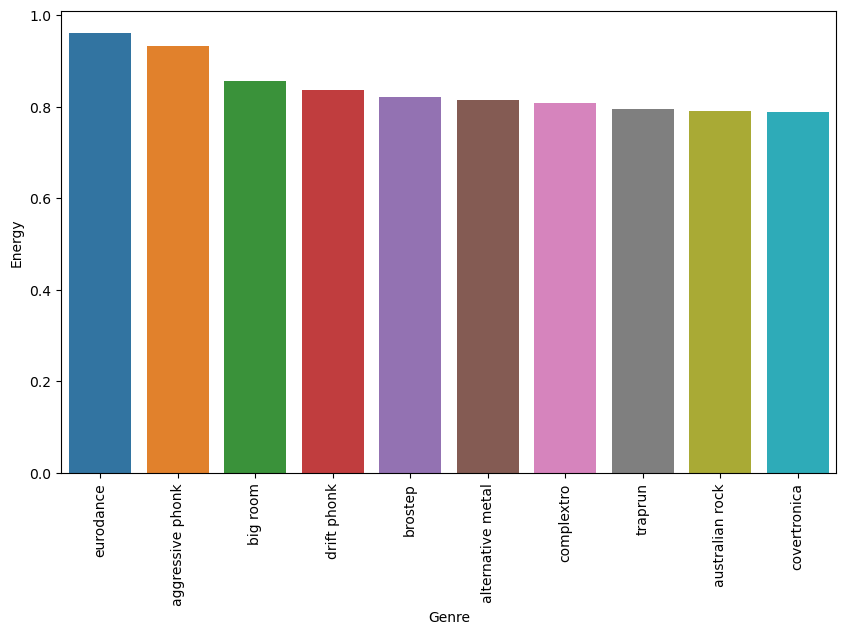

In [96]:
#2.11
plt.figure(figsize=(10, 6))
sns.barplot(x=gdf_["genre"], y=gdf_["energy"])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.show()

In [97]:

scaler = MinMaxScaler()
train[numericColumns] = scaler.fit_transform(train[numericColumns])
train

NameError: name 'numericColumns' is not defined

In [110]:
#2.13
cor = df[numericColumns].corr()
cor


,msPlayed,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key
msPlayed,1.000000,-0.017254,-0.036103,0.000190,-0.035751,0.014488,-0.041769,-0.026151,-0.010646,0.003055,0.060582,0.026468
danceability,-0.017254,1.000000,0.277729,0.325836,0.180340,-0.261199,-0.229848,0.006503,0.484760,0.009501,-0.120999,0.020130
energy,-0.036103,0.277729,1.000000,0.797092,0.159274,-0.765161,-0.367535,0.192994,0.448547,0.194298,0.130395,0.018073
loudness,0.000190,0.325836,0.797092,1.000000,0.117273,-0.644611,-0.574075,0.135925,0.382998,0.172717,0.111417,0.004905
speechiness,-0.035751,0.180340,0.159274,0.117273,1.000000,-0.104853,-0.107087,0.138333,0.131875,0.110031,-0.086864,0.000495
acousticness,0.014488,-0.261199,-0.765161,-0.644611,-0.104853,1.000000,0.322443,-0.129970,-0.305580,-0.169778,-0.111690,-0.004327
instrumentalness,-0.041769,-0.229848,-0.367535,-0.574075,-0.107087,0.322443,1.000000,-0.055113,-0.308459,-0.097843,-0.101331,-0.005269
liveness,-0.026151,0.006503,0.192994,0.135925,0.138333,-0.129970,-0.055113,1.000000,0.076991,0.013823,-0.006291,0.035003
valence,-0.010646,0.484760,0.448547,0.382998,0.131875,-0.305580,-0.308459,0.076991,1.000000,0.110969,-0.019807,0.047748
tempo,0.003055,0.009501,0.194298,0.172717,0.110031,-0.169778,-0.097843,0.013823,0.110969,1.000000,0.000187,0.012974


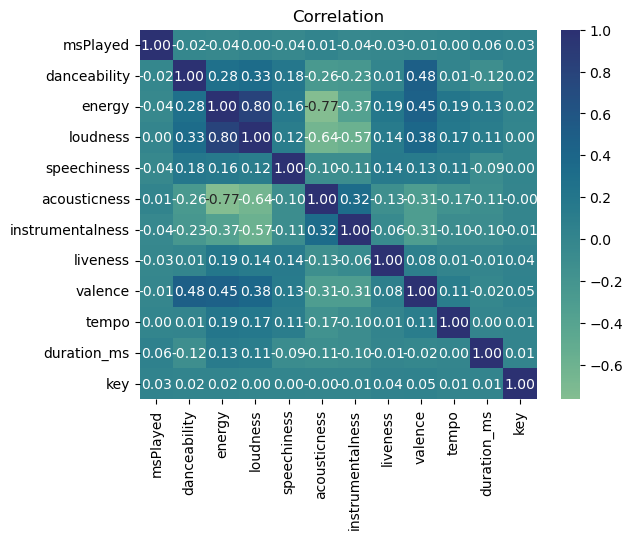

In [109]:
plt.figure()
sns.heatmap(cor, annot=True, cmap='crest', center=0 , fmt=".2f")
plt.title('Correlation')
plt.show()

In [93]:
g

NameError: name 'g' is not defined

In [94]:
#2.14
g = df.groupby('danceable').agg({'msPlayed': ['mean', 'std'],
                                         'danceability': ['mean', 'std'],
                                         'energy': ['mean', 'std'],
                                         'loudness': ['mean', 'std'],
                                         'speechiness': ['mean', 'std'],
                                         'acousticness': ['mean', 'std'],
                                         'instrumentalness': ['mean', 'std'],
                                         'liveness': ['mean', 'std'],
                                         'valence': ['mean', 'std'],
                                         'tempo': ['mean', 'std'],
                                         'duration_ms': ['mean', 'std']})

plt.figure(figsize=(15, 10))
features = ['msPlayed', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
for fture in features:
    mean_0 = g.loc[0, (fture, 'mean')]
    std_0 = g.loc[0, (fture, 'std')]
    
    mean_1 = g.loc[1, (fture, 'mean')]
    std_1 = g.loc[1, (fture, 'std')]
    
    x = np.linspace(train[fture].min(), train[fture].max(), 1000)
    pdf_0 = norm.pdf(x, mean_0, std_0)
    pdf_1 = norm.pdf(x, mean_1, std_1)
    
    plt.plot(x, pdf_0, label=f'{fture} (danceable=0)')
    plt.plot(x, pdf_1, label=f'{fture} (danceable=1)')

plt.title('Probability Density Functions (PDFs) by Danceability')
plt.xlabel('Feature Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()




KeyError: 'danceable'

In [121]:
#2.16
categorized = train.groupby('danceable').agg({'danceability': ['mean', 'std']})

mean_danceable = categorized.loc[1, ('danceability', 'mean')]
std_danceable = categorized.loc[1, ('danceability', 'std')]
pdf_danceable = norm(loc=mean_danceable, scale=std_danceable)

mean_non_danceable = categorized.loc[0, ('danceability', 'mean')]
std_non_danceable = categorized.loc[0, ('danceability', 'std')]
pdf_non_danceable = norm(loc=mean_non_danceable, scale=std_non_danceable)

predictions = []
for index, row in test.iterrows():
    prob_danceable = pdf_danceable.pdf(row['danceability'])
    prob_non_danceable = pdf_non_danceable.pdf(row['danceability'])

    if prob_danceable > 0.2:
        predictions.append(1)
    else:
        predictions.append(0)

test['Predicted_Danceable'] = predictions
test

,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,danceable,Predicted_Danceable
4250,Kygo,5460012,edm,0.659,0.742,0.0,-4.624,1.0,0.0283,0.146000,0.000000,0.2170,0.729,106.947,76c4KOymiPUkWEeIIc0DQr,178413.0,4.0,1,1
6844,Sasha Alex Sloan,196277,alt z,0.692,0.248,10.0,-11.304,0.0,0.0283,0.919000,0.000013,0.1020,0.437,100.111,7loj0fBXhoXz80KVXAFYex,166372.0,4.0,1,1
7080,Vampire Weekend,286160,baroque pop,0.636,0.879,9.0,-5.204,1.0,0.0511,0.001230,0.000156,0.0586,0.752,134.034,40cAeDaZAnPY9bUHf4jYXW,286160.0,4.0,1,1
113,DREAMDNVR,3734865,dark r&b,0.708,0.420,9.0,-9.478,0.0,0.1210,0.471000,0.000000,0.3530,0.317,145.981,1UyDQh3HBJwL6IxR9mXipZ,175827.0,4.0,1,1
8467,Winona Oak,1635301,swedish pop,0.384,0.513,11.0,-8.664,0.0,0.0567,0.725000,0.000029,0.1310,0.265,104.878,3JRCle6ESV3KCRNaD7ajDu,201747.0,4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,blackbear,298186,pop,0.680,0.423,6.0,-6.279,1.0,0.0321,0.597000,0.000000,0.3710,0.686,85.042,0rWMOzZ7fFYZWI1qlCY4Ig,149254.0,4.0,1,1
1114,AP Dhillon,0,desi hip hop,0.854,0.611,8.0,-6.260,0.0,0.0864,0.223000,0.000000,0.1190,0.417,100.024,58f4twRnbZOOVUhMUpplJ4,254400.0,4.0,1,1
5559,Jubin Nautiyal,258878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
9959,Gill Chang,289650,future bass,0.713,0.867,5.0,-1.237,1.0,0.0313,0.582000,0.000084,0.1160,0.792,130.009,2Ic3ZpvOSXUsmXcIrFpwz4,187418.0,4.0,1,1


In [124]:
%%time
#2.17
test[['id', 'Predicted_Danceable']].to_csv('predictions.csv', index=False)
accuracy = np.sum(predictions == test['danceable'])/len(test)
print(f'Accuracy: {accuracy * 100:.2f} %')

Accuracy: 86.71 %
CPU times: total: 15.6 ms
Wall time: 15.9 ms


In [125]:
####part3#####
#Theorical Questions#
#3.1
from IPython.display import display, Math, Latex

display(Math(r'p(x|\mu) = \frac{e^-\frac{(x-\mu)^2}{2\sigma^2}}{\sqrt{2\pi}\sigma}'))

<IPython.core.display.Math object>

In [126]:
display(Math(r'L(\mu) = p(x_{1}∣μ)⋅p(x_{2}∣μ)⋅…⋅p(x_{n}∣μ)'))


<IPython.core.display.Math object>

In [127]:
display(Math(r'ln (L(\mu)) = ln(p(x_{1}∣μ)) + ln(p(x_{2}∣μ)) + … + ln(p(x_{n}∣μ))'))


<IPython.core.display.Math object>

In [128]:
display(Math(r'ln (L(\mu)) = \sum_{i = 1}^{n}(-\frac{(x-\mu)^2}{2\sigma^2} - ln(\sqrt{2\pi}\sigma))'))

<IPython.core.display.Math object>

In [129]:
display(Math(r'\frac{d }{d\mu} ln(L(\mu)) = \sum_{i=1}^{n}(x_{i} - \mu) = 0'))

<IPython.core.display.Math object>

In [130]:
display(Math(r'\sum_{i=1}^{n}x_{i} - n\mu = 0 \to \mu = \frac{1}{n}\sum_{i=1}^{n}x_{i}'))

<IPython.core.display.Math object>

In [131]:
display(Math(r'\mu = \frac{1}{n}\sum_{i=1}^{n}x_{i}'))

<IPython.core.display.Math object>

In [132]:
##3.2
arr = np.array([[10, -9],[4, 2]])

In [133]:
eigvlues, eigvectrs = np.linalg.eig(arr)
print("Eigenvalues:", eigvlues)
print("Eigenvectors:")
for i in range(len(eigvlues)):
    print(f"For eigenvalue {i+1}: {eigvectrs[:, i]}")

Eigenvalues: [6.+4.47213595j 6.-4.47213595j]
Eigenvectors:
For eigenvalue 1: [0.83205029+0.j         0.36980013-0.41344912j]
For eigenvalue 2: [0.83205029-0.j         0.36980013+0.41344912j]


In [134]:
#3.3
A = np.array([[0, -1, 5],[2, 4, 6], [1, 1, 5]])
rank = np.linalg.matrix_rank(A)
print("Rank of matrix A:", rank)

Rank of matrix A: 3
